# Airplane problem probability simulator

The goal of this note book is to test different versions of the airplane problem to confirm answers.

The airplane problem is a trick question that ultimately has a very simple answer that is not intuitive at first glance. It asks what probability the last passenger getting onto the plane has of getting their assigned seat if the first person on the plane guesses.

In [1]:
import random

In [8]:
def airplane(n_seats, number):
    
    # the number of seats should always be greater than the passenger number we are interested in
    # so when we are given a number that is too high we just assume they wanted the last passenger
    if n_seats < number:
        print('you wanted passenger ', number, ' on a plane with ', n_seats, ' seats?')
        number  = n_seats
        print('just assumingn you want the last one')

    # Making empty plane
    seats = {i:'empty' for i in range(n_seats)}
    
    # randint will will return a number out of the dict range unless we do this
    n_seats = n_seats - 1
    
    # We give the first passenger, also known as the asshole or nick, a random seat
    
    asshole = random.randint(0, n_seats)
    nick = asshole
    seats[nick] = 'filled'
    
    # The other passengers try to sit in their assigned seat, but will sit randomly if it's filled
    
    for passenger in range(1, number-1):
        if seats[passenger] == 'filled' :
            random_sit = random.randint(0, n_seats)
            while seats[random_sit] == 'filled':
                random_sit = random.randint(0, n_seats)
            seats[random_sit] = 'filled'
        else:
            seats[passenger] = 'filled'
    
    # returns 1 or 0 for prob function
    return 1 if seats[number-1] == 'empty' else 0

    
    

In [9]:
def prob(attempts, n_seats, number):
    li = [airplane(n_seats, number) for _ in range(attempts)]
    
    return sum(li)/len(li)

In [10]:
prob(1000, 100, 100)

0.501

In [23]:
prob(1000, 100, 100)

0.993

In [27]:
y = [prob(10000, 100, i+1) for i in range(100)]
x = [i for i in range(1, 101)]


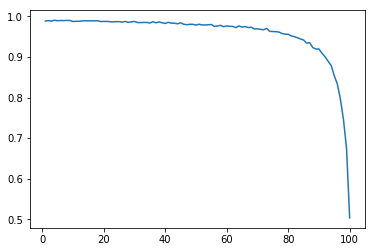

In [28]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

This confirms that if you wanted to get the probability that the 75th passenger on a 100 seat flight finds their seat, it would be (100 - 75)/(100 - 75 + 1)